## read txt

In [2]:
import pandas as pd

data0 = pd.read_csv('poses0.txt', sep=' ', header=None)
data1 = pd.read_csv('poses1.txt', sep=' ', header=None)
data2 = pd.read_csv('poses2.txt', sep=' ', header=None)
data3 = pd.read_csv('poses3.txt', sep=' ', header=None)
data4 = pd.read_csv('poses4.txt', sep=' ', header=None)
data5 = pd.read_csv('poses5.txt', sep=' ', header=None)
data6 = pd.read_csv('poses6.txt', sep=' ', header=None)
data7 = pd.read_csv('poses7.txt', sep=' ', header=None)
data8 = pd.read_csv('poses8.txt', sep=' ', header=None)
data9 = pd.read_csv('poses9.txt', sep=' ', header=None)
# 将数据汇拼接到 data 中
data = pd.concat([data0, data1, data2, data3, data4, data5, data6, data7, data8, data9])
# 打乱顺序
data = data.sample(frac = 1).reset_index(drop = True)
data = data.replace(-1, 0)

#### 将标签和数据分开

In [3]:
data_10_class = data.values[:, :-1]
label_10_class = data.values[:, -1]

X = data_10_class
y = label_10_class

## 方案1  搭建全连接神经网络

In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam, SGD, rmsprop
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# from sklearn.decomposition import PCA
# pca = PCA(n_components = 12)
# X = pca.fit_transform(X)

# 将训练集和测试集切割
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# 对 label 进行 ont-hot 编码
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# 将数据处理成浮点型数字
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 数据归一化
X_min =  X.min()
X_max = X.max()
X_train = X_train - X_min / X_max - X_min
X_test = X_test - X_min / X_max - X_min

# 序贯模型
model = Sequential()
# 全连接层
model.add(Dense(24, input_shape = (X_train.shape[1:])))
#model.add(Dropout(0.5))
model.add(Dense(48, activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#选择Adam优化器，交叉熵作损失函数
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['mae', 'acc']
    )

# 训练
model.fit(X_train, y_train, epochs = 80, batch_size = 64, verbose = 1, validation_split = 0.2)


Train on 14228 samples, validate on 3558 samples
Epoch 1/80
14228/14228 [==============================] - 1s 104us/step - loss: 1.9227 - mean_absolute_error: 0.1662 - acc: 0.3807 - val_loss: 1.6835 - val_mean_absolute_error: 0.1566 - val_acc: 0.4918
Epoch 2/80
14228/14228 [==============================] - 1s 66us/step - loss: 1.5404 - mean_absolute_error: 0.1479 - acc: 0.5231 - val_loss: 1.4515 - val_mean_absolute_error: 0.1414 - val_acc: 0.5433
Epoch 3/80
14228/14228 [==============================] - 1s 66us/step - loss: 1.3342 - mean_absolute_error: 0.1339 - acc: 0.5789 - val_loss: 1.2947 - val_mean_absolute_error: 0.1304 - val_acc: 0.6026
Epoch 4/80
14228/14228 [==============================] - 1s 65us/step - loss: 1.1877 - mean_absolute_error: 0.1230 - acc: 0.6212 - val_loss: 1.1615 - val_mean_absolute_error: 0.1197 - val_acc: 0.6298
Epoch 5/80
14228/14228 [==============================] - 1s 67us/step - loss: 1.0701 - mean_absolute_error: 0.1134 - acc: 0.6594 - val_loss: 1.07

In [79]:
#测试
score = model.evaluate(X_test, y_test, verbose = 1)
print('loss:', score[0])
print('accuracy:', score[1])

4447/4447 [==============================] - 0s 53us/step
loss: 0.486394464822
accuracy: 0.0440200961312


## 方案2 卷积神经网络

In [80]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam, SGD, rmsprop
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# from sklearn.decomposition import PCA
# pca = PCA(n_components = 12)
# X = pca.fit_transform(X)

# 将训练集和测试集切割
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10)

# 对 label 进行 ont-hot 编码
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# 将数据处理成浮点型数字
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 数据归一化
X_min =  X.min()
X_max = X.max()
X_train = X_train - X_min / X_max - X_min
X_test = X_test - X_min / X_max - X_min


#将 X_train 的每一行 reshape 成 12 * 2 的矩阵，以便于进行卷积
X_train_conv = X_train.reshape(X_train.shape[0], 12 ,2, 1)
X_test_conv = X_test.reshape(X_test.shape[0], 12 ,2, 1)


# 序贯模型
model = Sequential()
# 卷积层
model.add(Conv2D(
    16, 
    strides = 1,
    padding = 'same',
    activation = 'relu', 
    kernel_size = (3, 3),
    input_shape = (X_train_conv.shape[1:])))

model.add(Conv2D(
    32, 
    strides = 1,
    padding = 'same', 
    activation = 'relu', 
    kernel_size = (3, 3)
    ))

model.add(Conv2D(
    64, 
    strides = 1,
    padding = 'same', 
    activation = 'relu', 
    kernel_size = (3, 3)
    ))

# 扁平化处理
model.add(Flatten())

# 全链接层
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

adam = Adam(lr=0.001, beta_1=0.5, beta_2=0.999, epsilon=1e-08)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['mae', 'acc']
    )

# 训练
model.fit(X_train_conv, y_train, epochs = 100, batch_size = 64, verbose = 1, validation_split = 0.1)


Train on 12005 samples, validate on 1334 samples
Epoch 1/100
12005/12005 [==============================] - 2s 175us/step - loss: 2.4155 - mean_absolute_error: 0.1640 - acc: 0.2376 - val_loss: 1.7406 - val_mean_absolute_error: 0.1497 - val_acc: 0.3508
Epoch 2/100
12005/12005 [==============================] - 1s 92us/step - loss: 1.8470 - mean_absolute_error: 0.1526 - acc: 0.2960 - val_loss: 1.5522 - val_mean_absolute_error: 0.1428 - val_acc: 0.4865
Epoch 3/100
12005/12005 [==============================] - 1s 93us/step - loss: 1.7115 - mean_absolute_error: 0.1452 - acc: 0.3320 - val_loss: 1.3189 - val_mean_absolute_error: 0.1328 - val_acc: 0.4925
Epoch 4/100
12005/12005 [==============================] - 1s 91us/step - loss: 1.5379 - mean_absolute_error: 0.1362 - acc: 0.3851 - val_loss: 1.0642 - val_mean_absolute_error: 0.1123 - val_acc: 0.6619
Epoch 5/100
12005/12005 [==============================] - 1s 94us/step - loss: 1.3097 - mean_absolute_error: 0.1195 - acc: 0.4874 - val_loss:

12005/12005 [==============================] - 1s 90us/step - loss: 0.1292 - mean_absolute_error: 0.0127 - acc: 0.9556 - val_loss: 0.2797 - val_mean_absolute_error: 0.0145 - val_acc: 0.9423
Epoch 82/100
12005/12005 [==============================] - 1s 92us/step - loss: 0.1380 - mean_absolute_error: 0.0130 - acc: 0.9538 - val_loss: 0.2855 - val_mean_absolute_error: 0.0146 - val_acc: 0.9363
Epoch 83/100
12005/12005 [==============================] - 1s 92us/step - loss: 0.1423 - mean_absolute_error: 0.0136 - acc: 0.9536 - val_loss: 0.3056 - val_mean_absolute_error: 0.0158 - val_acc: 0.9370
Epoch 84/100
12005/12005 [==============================] - 1s 91us/step - loss: 0.1169 - mean_absolute_error: 0.0114 - acc: 0.9606 - val_loss: 0.3404 - val_mean_absolute_error: 0.0155 - val_acc: 0.9340
Epoch 85/100
12005/12005 [==============================] - 1s 92us/step - loss: 0.1196 - mean_absolute_error: 0.0113 - acc: 0.9612 - val_loss: 0.2952 - val_mean_absolute_error: 0.0124 - val_acc: 0.946

In [81]:
# 测试模型
score = model.evaluate(X_test_conv, y_test, verbose = 1)
print('loss:', score[0])
print('accuracy:', score[1])

8894/8894 [==============================] - 1s 69us/step
loss: 0.353441328399
accuracy: 0.0131262589431


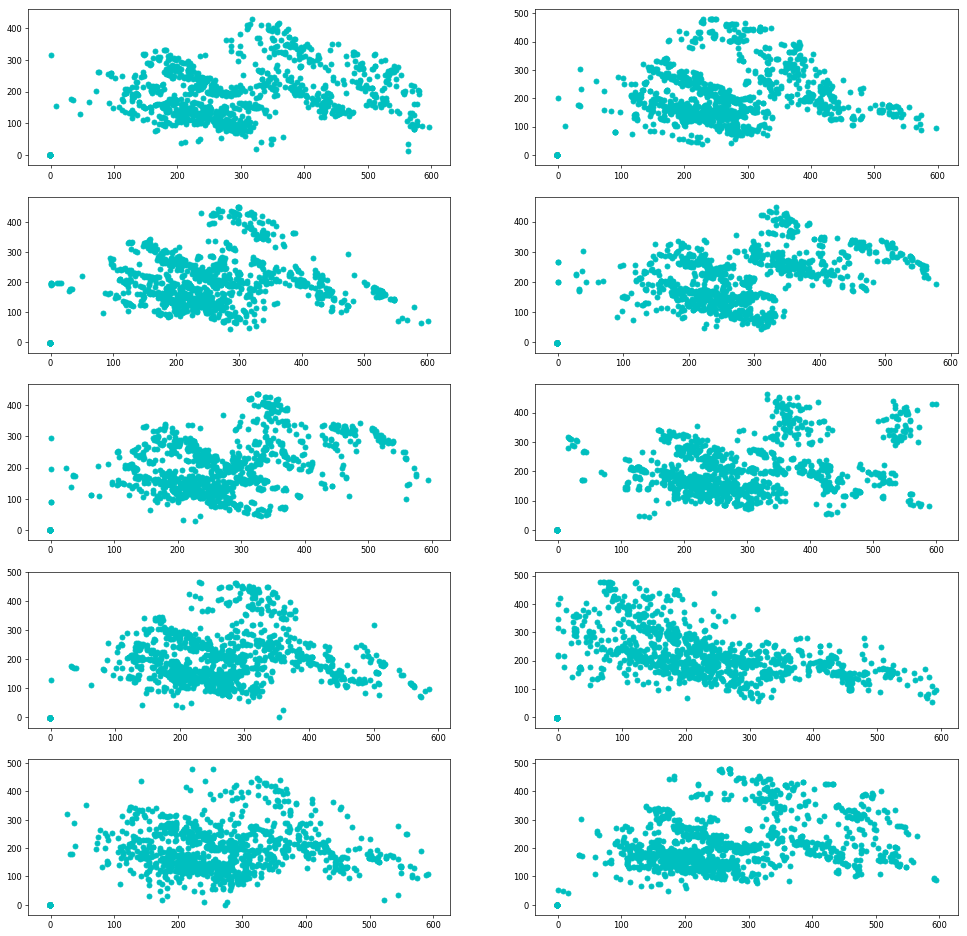

In [49]:
# 可视化10类数据分布，可以比较不同

import matplotlib.pyplot as plt

plt.figure(figsize = (20,20), dpi =60)

for i in range(10):
    file_data = pd.read_csv('poses'+ str(i) +'.txt', sep=' ', header=None)
    data_visual = file_data.values[:, :-1]
    data_visual = data_visual.reshape(data_visual.shape[0], 12 ,2)[:100]

    plt.subplot(5,2,i+1)    
    for zuobiao_list in data_visual:
        for idx2, value2 in enumerate(zuobiao_list):
            plt.scatter(value2[0], value2[1], color = 'c')

## 方案3： KNN

In [5]:
# 训练集测试集分割
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

/home/jiang/.conda/envs/keras/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# 将数据处理成浮点型数字
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

交叉验证:
1:, 0.9383
2:, 0.9213
3:, 0.9216
4:, 0.9126
5:, 0.9104
6:, 0.9031
7:, 0.9003
8:, 0.8953
9:, 0.8929
最优K： 1


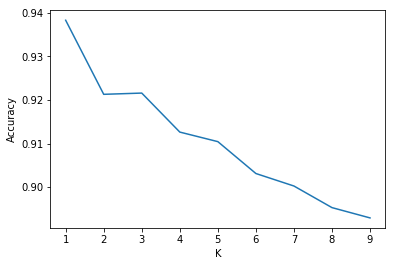

测试准确率： 0.943107713065


In [13]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.preprocessing
import matplotlib.pyplot as plt 
import numpy as np


# KNN交叉验证
k_range = range(1, 10)
cv_scores = []
print("交叉验证:")
for k in k_range:
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    score_mean = scores.mean()
    cv_scores.append(score_mean)
    print('%d:, %.4f' % (k, score_mean))
    
best_k = np.argmax(cv_scores) + 1
print('最优K：', best_k)

plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# 训练模型
knn_model = KNeighborsClassifier(best_k)
knn_model.fit(X_train, y_train)
print('测试准确率：', knn_model.score(X_test, y_test))